In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

#### Matrix rotation for semilandmarks

In [3]:
angle = -90.
theta = angle * np.pi/180.

rot_mat = np.array([[np.cos(theta), - np.sin(theta)],
                   [np.sin(theta), np.cos(theta)]])

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


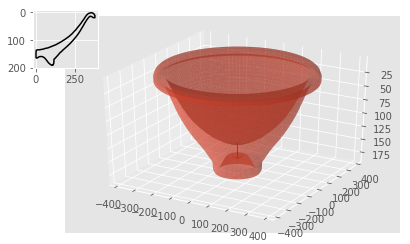

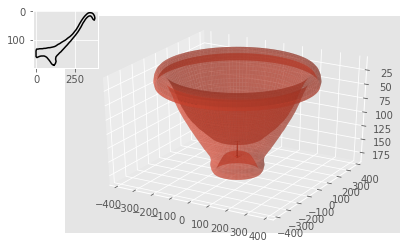

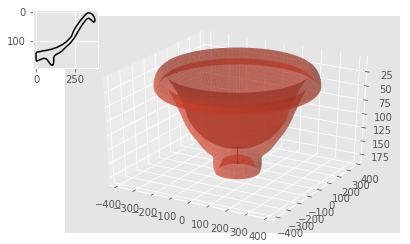

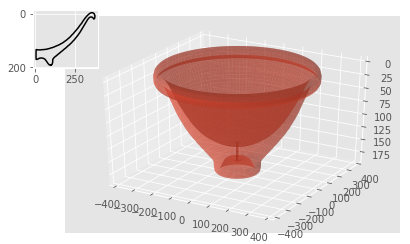

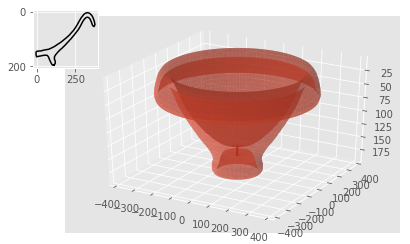

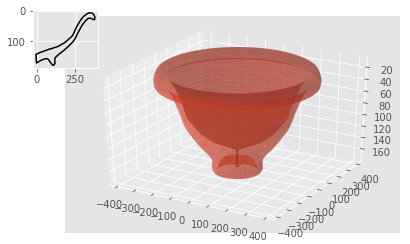

In [8]:
% matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv('data/procrustes_coordinates_homemade.txt') #, sep='\t')
for index, row in df.iterrows():
    edge_array = row.reshape(100, 2)
    # rotation of landmarks
    rotated = list()
    for edge in edge_array:
        rotated.append(np.dot(rot_mat, edge))
    edge_array = np.array(rotated)
    edge_array[:, 1] = edge_array[:, 1]*-1
    
    r = edge_array[:, 0]
    # angular component is one revolution of 60 steps
    phi = np.linspace(0, 2*np.pi, 120)
    R,Phi = np.meshgrid(r, phi)
    # transform to cartesian coordinates
    X = R*np.cos(Phi)
    Y = R*np.sin(Phi)
    Z = np.tile(edge_array[:,1], len(Y)).reshape(Y.shape)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax2 = fig.add_axes([0.05,0.7,0.15,.2])
    ax2.plot(edge_array[:,0], edge_array[:,1], color="k")
    plt.gca().invert_yaxis()
    ax.plot_surface(X, Y, Z, alpha=0.5, rstride=1, cstride=1)
    ax.invert_zaxis()
    # ax.set_aspect('equal')
    plt.savefig('/tmp/revol_{}.png'.format(index))
    plt.show()
    if index == 5:
        break